# Deep Hedging revisited

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


In [8]:
# Set device and the theme
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sns.set_theme()
plt.rcParams["figure.figsize"] = (15,4)

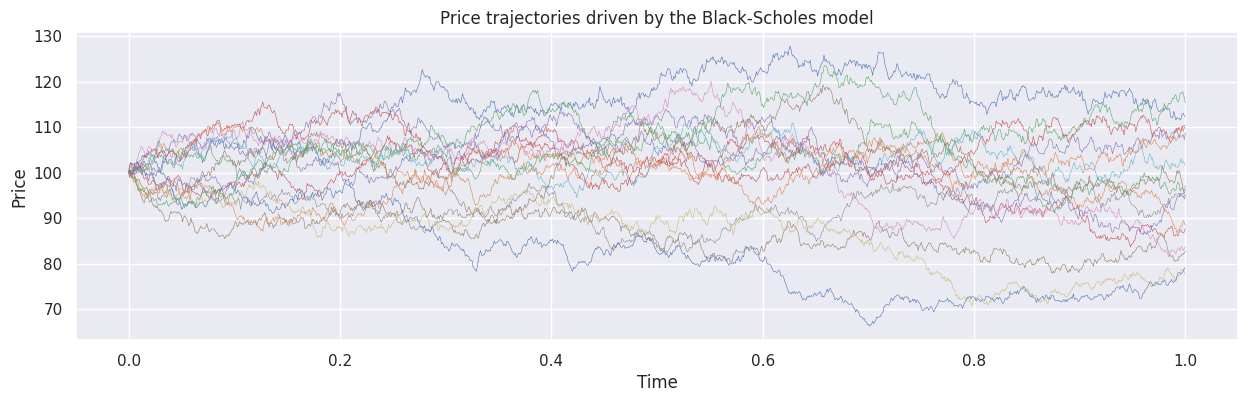

In [16]:
from generators import BlackScholesGenerator

# Set parameters
S0 = 100                # Initial stock price
r = 0.05                # Risk-free interest rate
sigma = 0.2             # Volatility
T = 1                   # Time horizon
N = 1000                # Number of time steps
batch_size = 16         # Number of paths in each batch
num_batches = 100       # Number of batches to generate

# Generate paths
BS_generator = BlackScholesGenerator(S0, r, sigma, T, N, batch_size, num_batches, DEVICE)
example_paths = next(BS_generator)

# Plot paths
plt.plot(np.linspace(0,1,num=N+1), example_paths.T, alpha=1, linewidth=0.4)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price trajectories driven by the Black-Scholes model")
plt.show()

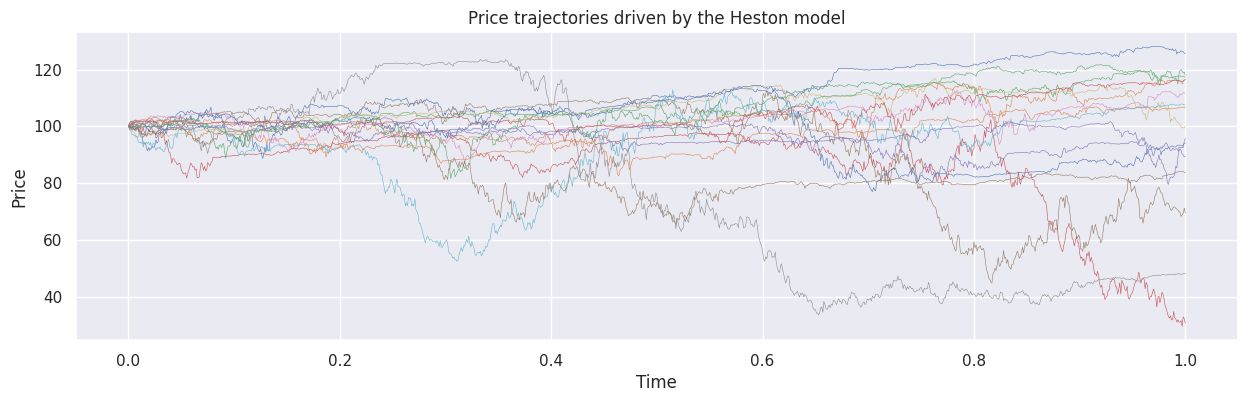

In [17]:
from generators import HestonGenerator

# Set parameters
S0 = 100              # the initial asset price
v0 = 0.04             # the initial volatility
r = 0                 # the risk-free rate
theta = 0.04          # the long-term price variance
kappa = 1             # the rate of reversion to theta
xi = 2                # the volatility of sqrt(V_t)  
rho = -0.7            # the correlation of Brownian motions
T = 1                 # Time period
N = 1000              # Number of trading days
num_batches = 100     # Number of batches
batch_size = 16       # Number of paths in each batch

# Generate paths
Heston_generator = HestonGenerator(S0, v0, r, theta, kappa, xi, rho, T, N, batch_size, num_batches, DEVICE)
example_paths = next(Heston_generator)

# Plot paths
plt.plot(np.linspace(0,1,num=N+1), example_paths.T, alpha=1, linewidth=0.4)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price trajectories driven by the Heston model")
plt.show()